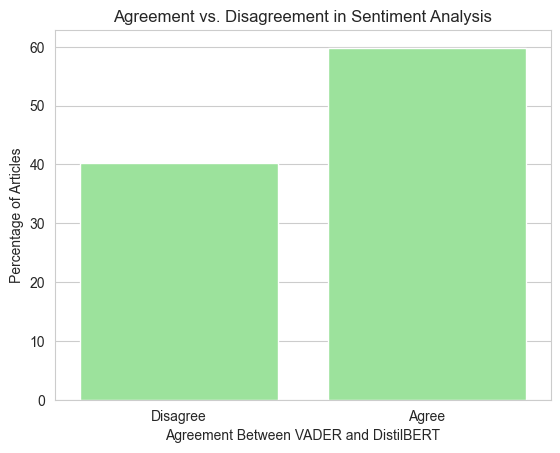

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/sentiment_article_data_new.csv')
df['Agreement'] = df['vader_discrete'] == df['sentiment']
agreement_percentage = df['Agreement'].value_counts(normalize=True) * 100
sns.barplot(x=agreement_percentage.index, y=agreement_percentage.values, color='lightgreen')
plt.xlabel('Agreement Between VADER and DistilBERT')
plt.ylabel('Percentage of Articles')
plt.title('Agreement vs. Disagreement in Sentiment Analysis')
plt.xticks([0, 1], ['Disagree', 'Agree'])  # Set the x-ticks to represent disagree and agree
plt.show()


<Figure size 1000x600 with 0 Axes>

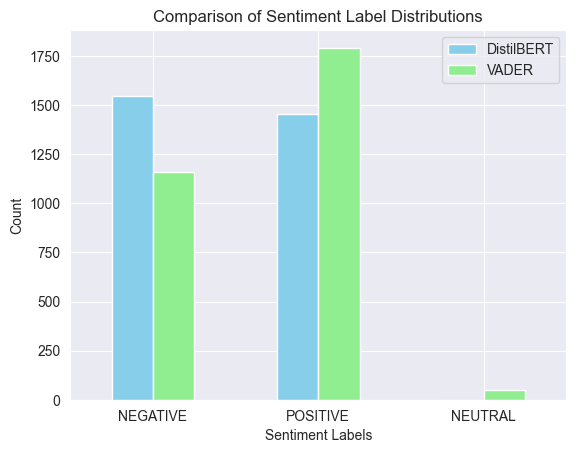

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df['pub_date'] = pd.to_datetime(df['pub_date'])
monthly_distilbert = df.groupby([pd.Grouper(key='pub_date', freq='M'), 'sentiment']).size().unstack(fill_value=0)
monthly_vader = df.groupby([pd.Grouper(key='pub_date', freq='M'), 'vader_discrete']).size().unstack(fill_value=0)
combined_data = pd.concat([monthly_distilbert.sum(), monthly_vader.sum()], axis=1)
combined_data.columns = ['DistilBERT', 'VADER']
plt.figure(figsize=(10, 6))
combined_data.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Comparison of Sentiment Label Distributions')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


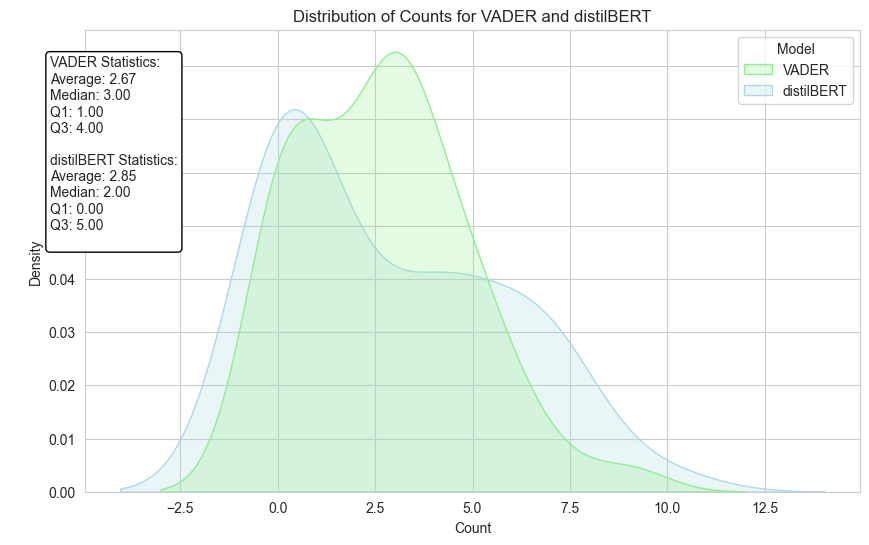

In [21]:
results = pd.read_csv('data/results_comparison.csv')
stats_vader = {
    'Average': results['count VADER'].mean(),
    'Median': results['count VADER'].median(),
    'Q1': results['count VADER'].quantile(0.25),
    'Q3': results['count VADER'].quantile(0.75)
}

stats_distilbert = {
    'Average': results['count distilBERT'].mean(),
    'Median': results['count distilBERT'].median(),
    'Q1': results['count distilBERT'].quantile(0.25),
    'Q3': results['count distilBERT'].quantile(0.75)
}

melted_data = results.melt(id_vars='state', value_vars=['count VADER', 'count distilBERT'], 
                        var_name='Model', value_name='Count')
melted_data['Model'] = melted_data['Model'].replace({'count VADER': 'VADER', 'count distilBERT': 'distilBERT'})


plt.figure(figsize=(10, 6))
sns.kdeplot(data=melted_data, x='Count', hue='Model', fill=True, 
            palette={'VADER': 'lightgreen', 'distilBERT': 'lightblue'})

stats_text = "VADER Statistics:\n"
for stat, value in stats_vader.items():
    stats_text += f"{stat}: {value:.2f}\n"

stats_text += "\ndistilBERT Statistics:\n"
for stat, value in stats_distilbert.items():
    stats_text += f"{stat}: {value:.2f}\n"

plt.annotate(stats_text, xy=(0.05, 0.5), xycoords='figure fraction',
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.title('Distribution of Counts for VADER and distilBERT')
plt.xlabel('Count')
plt.ylabel('Density')
plt.show()